Topic:        Challenge Set 6  
Subject:      Linear Regression and Learning Curve challenges
Date:         10/9/2017  
Name:         Pradnya Nimkar

### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)


In [303]:
import random
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.externals.six import StringIO 
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
x = np.linspace(1,200,2000)
len(x)

2000

In [305]:
log_x = np.log(x)
len(log_x)
type(log_x)

numpy.ndarray

In [306]:
beta_0 = 2.5
beta_1 = 5

In [307]:
epsilon = []
for i in range(1,2001):
    epsilon.append(random.random())
len(epsilon)

2000

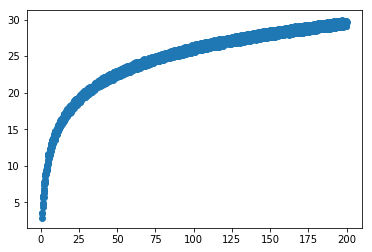

In [308]:
plt.scatter(x,y)

In [309]:
y = []

for j,k in zip(log_x,epsilon) :
    res = beta_0 + beta_1* j + k
    y.append(res)

len(y)

2000

In [310]:
df = pd.DataFrame()
df["X"] = x
df["y"] = y
df['log_X'] = log_x
df['X_sq'] = x*x
df.columns

Index(['X', 'y', 'log_X', 'X_sq'], dtype='object')

Fitting quadratic (second degree polynomial)

In [311]:
selected_columns = ['log_X']

In [312]:
X = df.loc[:,['X','X_sq','log_X']]
y = df['y']

In [313]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [314]:
y_train.shape

(1400,)

In [315]:
lr_model = LinearRegression()
lr_model.fit(X_train.loc[:,selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
test_set_pred = lr_model.predict(X_test.loc[:,selected_columns])

In [317]:
# R-square
r2_score(y_test, test_set_pred)

0.9958474453845283

R-square for log model is high

Fitting for quadratic model now.

In [318]:
selected_columns2 = ['X_sq'] # ignoring first order term as the challange specifically asks to use second degree term

In [319]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns2])

In [321]:
# R-square for quadratic function
r2_score(y_test, test_set_pred2)

0.64119346027692581

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)



using the same x and y values from challenge 1 as I have already split the data in challenge 1

In [322]:
selected_columns3 = ['X','X_sq']

In [323]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,selected_columns3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [324]:
test_set_pred3 =lr_model3.predict(X_test.loc[:,selected_columns3])

In [325]:
#MSE on test dataset
mean_squared_error(y_test, test_set_pred3)

1.2932654183644097

In [326]:
#MSE on train set
train_set_pred3 = lr_model3.predict(X_train.loc[:,selected_columns3])
mean_squared_error(y_train, train_set_pred3)

1.7519355773076515

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


In [327]:
import statsmodels.api as sm

In [328]:
beta_2 = 7

In [329]:
y2 = []

for j,k in zip(x,epsilon) :
    res = beta_0 + beta_1* j+ beta_2* (j**2) + k
    y2.append(res)

len(y2)

2000

In [330]:
number = [0,1,2,3,4,5,6,7]
name = 'df_{}' 
lr_model = 'lr_model_{}'
df3 = pd.DataFrame()
r_square = []
train_error = []
test_error = []

aic = []
for i in number:
    name2 = name.format(i)
    df3[name2] = np.power(x,i)
    
    X_train, X_test, y_train, y_test = train_test_split(df3, y2, test_size=0.3,random_state=42)
    
    lr_model_v = lr_model.format(i) 
    lr_model_v = LinearRegression()
    lr_model_v.fit(X_train,y_train)
    print(df3.columns)
    pred3 = lr_model_v.predict(X_test) 
    # R-square for quadratic function
    r2 = r2_score(y_test, pred3)
    r_square.append(r2)
    # I am measuring test error in terms of mse
    error = mean_squared_error(y_test, pred3)
    test_error.append(error)
    # I am measuring train error in terms of mse
    pred4 = lr_model_v.predict(X_train)
    error2 = mean_squared_error(y_train, pred4)
    train_error.append(error2)
    # Measuring AIC
    sm_model = sm.OLS(y_train, X_train)
    results = sm_model.fit()
    aic.append(results.aic)
    

Index(['df_0'], dtype='object')
Index(['df_0', 'df_1'], dtype='object')
Index(['df_0', 'df_1', 'df_2'], dtype='object')
Index(['df_0', 'df_1', 'df_2', 'df_3'], dtype='object')
Index(['df_0', 'df_1', 'df_2', 'df_3', 'df_4'], dtype='object')
Index(['df_0', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5'], dtype='object')
Index(['df_0', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6'], dtype='object')
Index(['df_0', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6', 'df_7'], dtype='object')


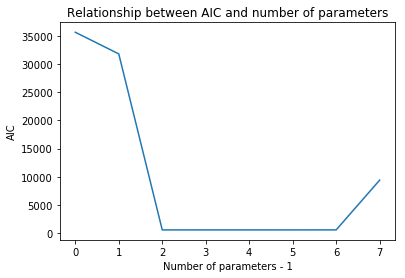

In [331]:
plt.plot(number,aic)
plt.xlabel('Number of parameters - 1')
plt.ylabel('AIC')
plt.title('Relationship between AIC and number of parameters')

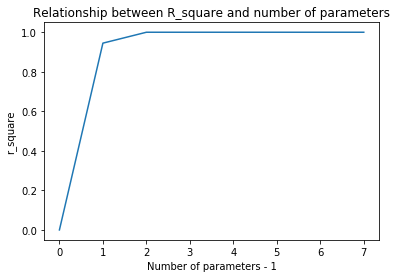

In [332]:
plt.plot(number,r_square)
plt.xlabel('Number of parameters - 1')
plt.ylabel('r_square')
plt.title('Relationship between R_square and number of parameters')

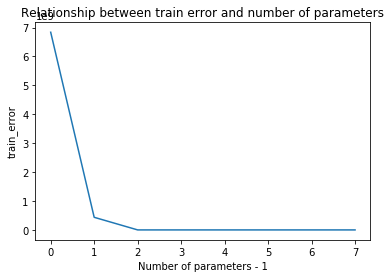

In [333]:
plt.plot(number,train_error)
plt.xlabel('Number of parameters - 1')
plt.ylabel('train_error')
plt.title('Relationship between train error and number of parameters')

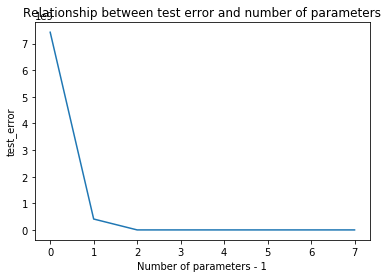

In [334]:
plt.plot(number,test_error)
plt.xlabel('Number of parameters - 1')
plt.ylabel('test_error')
plt.title('Relationship between test error and number of parameters')

In [335]:
df3.columns

Index(['df_0', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6', 'df_7'], dtype='object')

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [337]:
df5 = pd.DataFrame()
df5['X'] = df['X']
df5['X_sq'] = df['X_sq']
df5['y'] = df['y']
df5.columns

Index(['X', 'X_sq', 'y'], dtype='object')

In [338]:
#Separate our features from our target

X = df5.loc[:,['X','X_sq']]

y = df5['y']

In [339]:
X.head()

,X,X_sq
0,1.000000,1.000000
1,1.099550,1.209010
2,1.199100,1.437840
3,1.298649,1.686490
4,1.398199,1.954961


In [340]:
df5.columns

Index(['X', 'X_sq', 'y'], dtype='object')

In [341]:
m =[]
train_error2 = []
test_error2 = []

X = df5.loc[:,['X','X_sq']]
y = df5['y']
for m1 in range(5 ,len(X_train),5):
    print(m1)
    
    lr_model3 = LinearRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    
    lr_model3.fit(X_train.iloc[0:m1,:],y_train.iloc[0:m1])
    m.append(m1) 
    
    pred5 = lr_model3.predict(X_train.iloc[0:m1,:])
    error1 = mean_squared_error(y_train[0:m1], pred5)
    train_error2.append(error1)
    print
    
    pred4 = lr_model3.predict(X_test)
    error2 = mean_squared_error(y_test, pred4)
    test_error2.append(error2)
    

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220

In [342]:
df.columns

Index(['X', 'y', 'log_X', 'X_sq'], dtype='object')

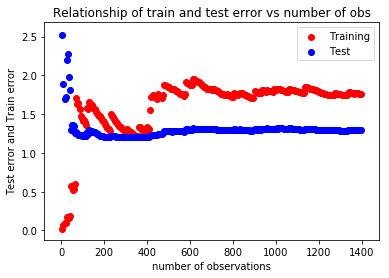

In [356]:
plt.scatter(m,train_error2, c='red', label = 'Training')
plt.scatter(m,test_error2, c ='blue' , label = 'Test')
plt.xlabel('number of observations')
plt.ylabel('Test error and Train error')
plt.title('Relationship of train and test error vs number of obs')
plt.legend()